# BiModal Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
using Turing
using Distributions
using ForwardDiff
using LinearAlgebra
using Random

using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

## MCHMC

In [3]:
d = 5
K = 2

2

In [4]:
@model function GaussMix(x)
    N = length(x)
    # Vector of std (1,..,K)
    σ ~ MvLogNormal(zeros(K), 0.25*ones(K))
    # Vector of mu (1,..,K)
    μ ~ MvNormal(zeros(K), ones(K))
    # Draw weights.
    π1 ~ Uniform(0,1)
    π2 = 1 - π1
    #likelihood
    for i in 1:N
        x[i] ~ MixtureModel(Normal, [(μ[i], σ[i]) for i = 1:K], [π1, π2])
    end
end

GaussMix (generic function with 2 methods)

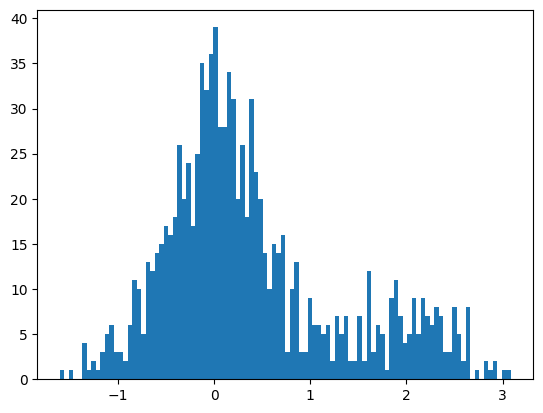

In [5]:
data_1 = [rand(Normal(0, 0.5)) for _ in 1:800]
data_2 = [rand(Normal(2, 0.5)) for _ in 1:200]
data = [data_1 ; data_2]        
plt.hist(data, bins=100);

In [6]:
GaussMix_model = GaussMix(data)

DynamicPPL.Model{typeof(GaussMix), (:x,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(GaussMix, (x = [1.0031078646966423, -0.19856765549456412, 0.19617373419494505, -0.1725900530113283, -0.1565578709325052, -1.33760188527138, 0.32832521985113067, 0.8374422669222876, -0.10583476886309004, -0.5623502218922471  …  1.6311912106598314, 1.1310507867564423, 2.8125935106560407, 1.1931665766047237, 2.0847501273071263, 2.064159134491608, 1.5318983503085988, 1.8677029441122484, 1.626066514982445, 2.237182415448611],), NamedTuple(), DynamicPPL.DefaultContext())

In [7]:
GaussMix_target = TuringTarget(GaussMix_model; d=d, compute_MAP=false)
GaussMix_target.d = d
GaussMix_spl = MCHMC(0.0, 0.5; init_eps=0.05, varE_wanted=1.0, sigma=ones(d));

In [8]:
GaussMix_samples_mchmc = Sample(GaussMix_spl, GaussMix_target, 100000;
                        dialog=true);

[ Info: Tuning eps ⏳


eps: 0.0005 --> VarE: 3.792523628193169e-5
eps: 0.0013590893694666397 --> VarE: 0.0015433836239037084
eps: 0.0035133718127759 --> VarE: 0.016551032244440805
eps: 0.00855433037672231 --> VarE: 0.06852753739044434
eps: 0.019070896126422827 --> VarE: 0.1787206519083994
eps: 0.03735885888313896 --> VarE: 0.38821972932118415
eps: 0.06016104338267889 --> VarE: 0.612495451978733
eps: 0.08016567676249313 --> VarE: 1.230477694932296
eps: 0.0681479151882688 --> VarE: 0.7039399937939679
eps: 0.08310754759175067 --> VarE: 1.3666410650232108
eps: 0.065782566640225 --> VarE: 0.6875495964306254
eps: 0.07950863307907545 --> VarE: 1.2741935054200142
eps: 0.0678751315921371 --> VarE: 0.7052977638035419
eps: 0.07979060242331122 --> VarE: 1.1661017328835703
eps: 0.07316323386893271 --> VarE: 1.123518220508163
eps: 0.06881045476461521 --> VarE: 0.7314294933018469
eps: 0.07811791505120602 --> VarE: 0.922750068856646
eps: 0.08087704578466592 --> VarE: 1.305300615102559
eps: 0.07098297123474054 --> VarE: 0.76

[ Info: Found eps: 0.07753777487718037 ✅


In [22]:
GaussMix_d1_mchmc = [sample[1] for sample in GaussMix_samples_mchmc]
GaussMix_d2_mchmc = [sample[2] for sample in GaussMix_samples_mchmc]
GaussMix_d3_mchmc = [sample[3] for sample in GaussMix_samples_mchmc]
GaussMix_d4_mchmc = [sample[4] for sample in GaussMix_samples_mchmc]
GaussMix_d5_mchmc = [sample[5] for sample in GaussMix_samples_mchmc];

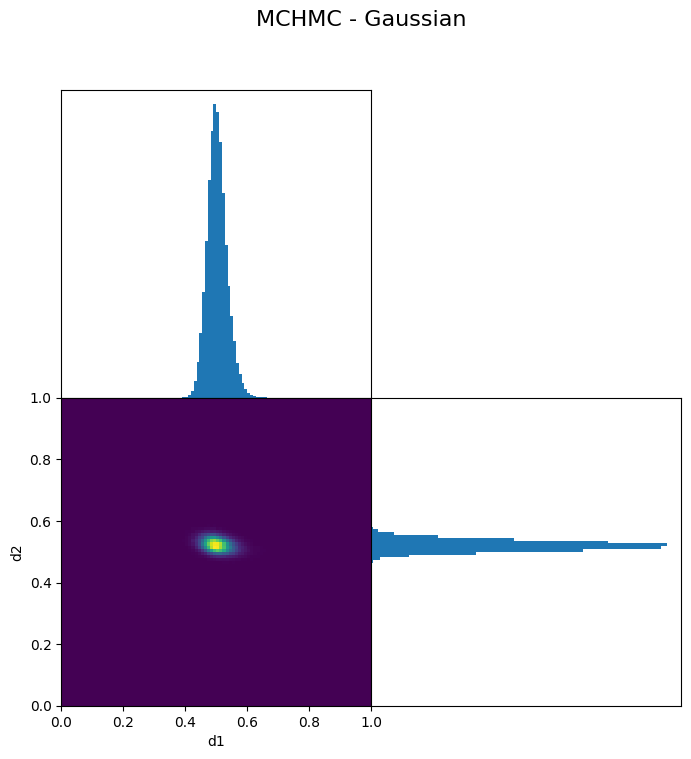

In [27]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(GaussMix_d1_mchmc, bins=100, range=[0.0,1.])
axis[1,1].set_yticks([])

axis[2,2].hist(GaussMix_d2_mchmc, bins=100, orientation="horizontal", range=[0.0,1.])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(GaussMix_d1_mchmc, GaussMix_d2_mchmc, bins=100, range=[[0.0,1.],[0.0,1.]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");

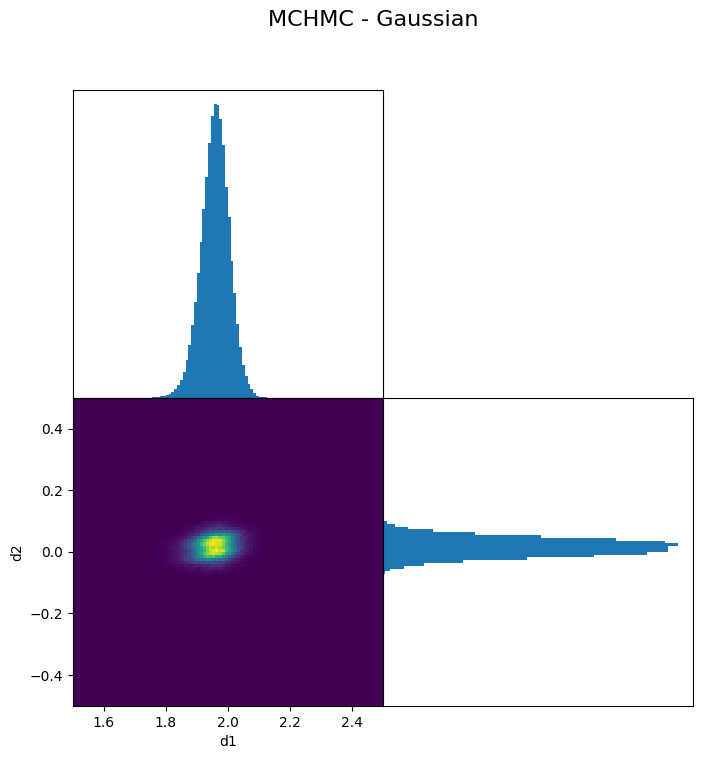

In [32]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(GaussMix_d3_mchmc, bins=100, range=[1.5,2.5])
axis[1,1].set_yticks([])

axis[2,2].hist(GaussMix_d4_mchmc, bins=100, orientation="horizontal", range=[-0.5,0.5])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(GaussMix_d3_mchmc, GaussMix_d4_mchmc, bins=100, range=[[1.5,2.5],[-0.5,0.5]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");

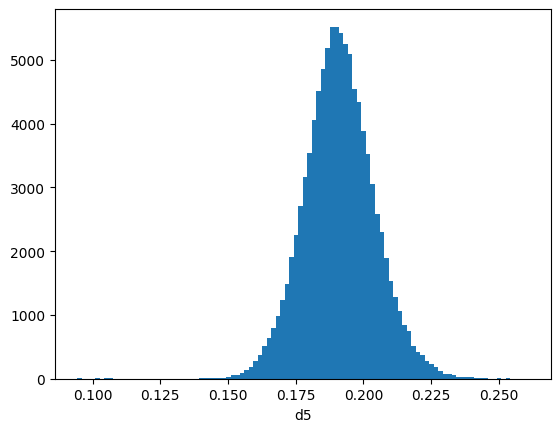

PyObject Text(0.5, 24.0, 'd5')

In [38]:
plt.hist(GaussMix_d5_mchmc, bins=100)
plt.xlabel("d5")

## NUTS

In [39]:
using AdvancedHMC
using LogDensityProblems

In [9]:
# Define the target distribution using the `LogDensityProblem` interface
struct LogTargetDensity
    dim::Int
end
LogDensityProblems.logdensity(p::LogTargetDensity, θ) = -gaussian_target.nlogp(θ) #-sum(abs2, θ) / 2  # standard multivariate normal
LogDensityProblems.dimension(p::LogTargetDensity) = p.dim
LogDensityProblems.capabilities(::Type{LogTargetDensity}) = LogDensityProblems.LogDensityOrder{0}()

In [10]:
# Choose parameter dimensionality and initial parameter value
initial_θ = gaussian_target.prior_draw(0.0)
ℓπ = LogTargetDensity(d)

# Set the number of samples to draw and warmup iterations
n_samples, n_adapts = 10_000, 1_000

# Define a Hamiltonian system
metric = DiagEuclideanMetric(d)
hamiltonian = Hamiltonian(metric, ℓπ, ForwardDiff)

# Define a leapfrog solver, with initial step size chosen heuristically
initial_ϵ = find_good_stepsize(hamiltonian, initial_θ)
integrator = AdvancedHMC.Leapfrog(initial_ϵ)

# Define an HMC sampler, with the following components
#   - multinomial sampling scheme,
#   - generalised No-U-Turn criteria, and
#   - windowed adaption for step-size and diagonal mass matrix
proposal = NUTS{MultinomialTS, GeneralisedNoUTurn}(integrator)
adaptor = StanHMCAdaptor(MassMatrixAdaptor(metric), StepSizeAdaptor(0.8, integrator))

# Run the sampler to draw samples from the specified Gaussian, where
#   - `samples` will store the samples
#   - `stats` will store diagnostic statistics for each sample
gaussian_samples_hmc, stats = sample(hamiltonian, proposal, initial_θ, n_samples, adaptor, n_adapts; progress=true)

LoadError: UndefVarError: `gaussian_target` not defined

In [11]:
gaussian_d1_hmc = [sample[1] for sample in gaussian_samples_hmc]
gaussian_d50_hmc = [sample[50] for sample in gaussian_samples_hmc];

LoadError: UndefVarError: `gaussian_samples_hmc` not defined

In [12]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(gaussian_d1_hmc, bins=100, range=[-8,8])
axis[1,1].set_yticks([])

axis[2,2].hist(gaussian_d50_hmc, bins=100, orientation="horizontal", range=[42, 58])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(gaussian_d1_hmc, gaussian_d50_hmc, bins=100, range=[[-8,8],[42, 58]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");

LoadError: UndefVarError: `gaussian_d1_hmc` not defined